SEM Image **Segmentation**

*   Image source [https://deben.co.uk/sem-tem-detectors/solid-state-backscatter-detector/]


Upload SEM image


Saving BS-Image-lrg.jpg to BS-Image-lrg (1).jpg


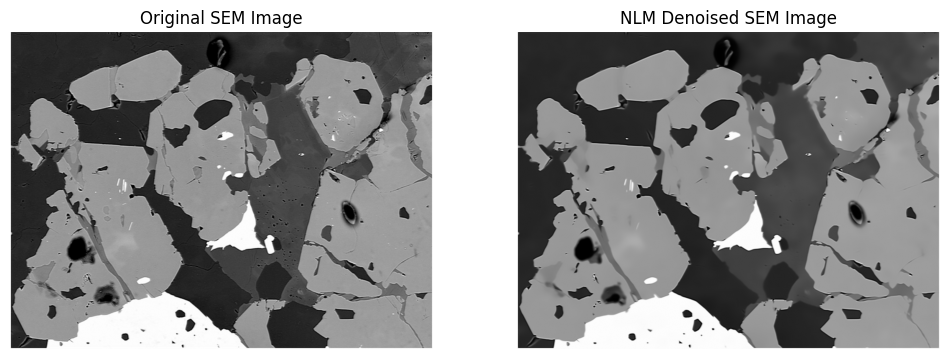

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload
print("Upload SEM image")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image
img = cv2.imread(filename)

# grayscale:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Non-Local Means Denoising
# grayscale:
denoised_gray = cv2.fastNlMeansDenoising(img_gray, None, h=20, templateWindowSize=7, searchWindowSize=21)


# graph
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original SEM Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(denoised_gray, cmap='gray')
plt.title('NLM Denoised SEM Image')
plt.axis('off')
plt.show()


Upload SEM image


Saving BS-Image-lrg.jpg to BS-Image-lrg (8).jpg


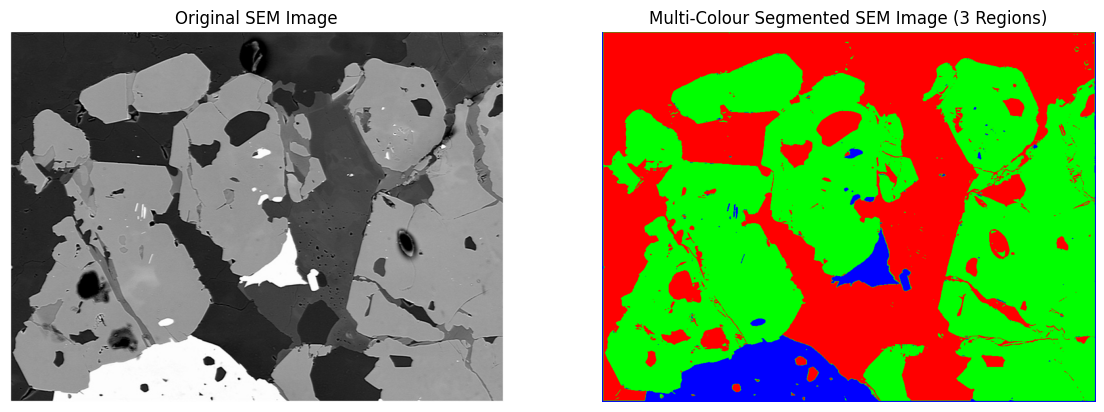

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload
print("Upload SEM image")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# color
img_bgr = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = img_gray

# clustering
h, w = img_blur.shape
pixels = img_blur.reshape((-1, 1)).astype(np.float32)

# number of colours
num_clusters = 3

# K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
labels = labels.flatten().reshape((h, w))

# artificial colors
colors = [
    (255, 0, 0),      # Red
    (0, 255, 0),      # Green
    (0, 0, 255),      # Blue
    (255, 255, 0),    # Yellow
    (255, 0, 255),    # Magenta
    (0, 255, 255),    # Cyan
    (255, 128, 0),    # Orange
    (128, 0, 255),    # Violet
    (128, 255, 0),    # Lime
    (0, 128, 255),    # Sky blue
]

colors = colors[:num_clusters]

segmented_image = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(num_clusters):
    segmented_image[labels == i] = colors[i]

# graph
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original SEM Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title(f'Multi-Colour Segmented SEM Image ({num_clusters} Regions)')
plt.axis('off')

plt.show()


Upload SEM image


Saving BS-Image-lrg.jpg to BS-Image-lrg (9).jpg


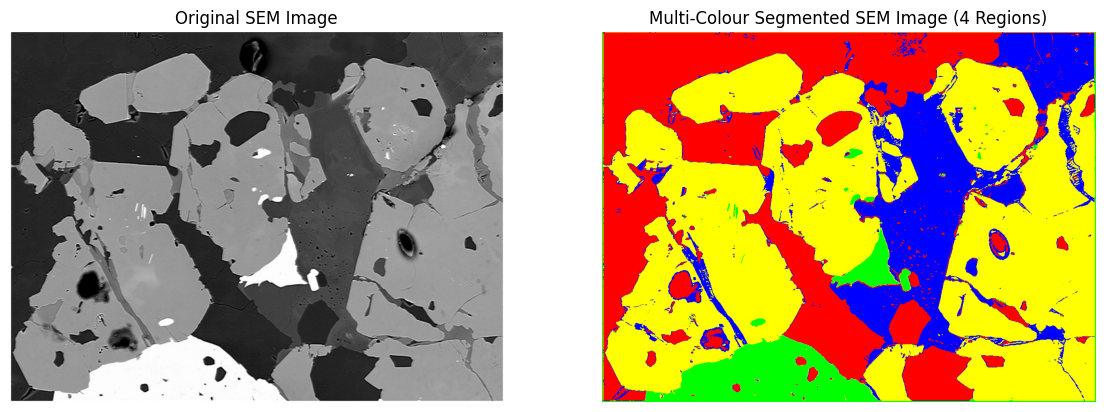

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload
print("Upload SEM image")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Color
img_bgr = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = img_gray

# Clustering
h, w = img_blur.shape
pixels = img_blur.reshape((-1, 1)).astype(np.float32)

# Number of clusters
num_clusters = 4

# K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
labels = labels.flatten().reshape((h, w))

# Artificial colors (at least 4)
colors = [
    (255, 0, 0),      # Red
    (0, 255, 0),      # Green
    (0, 0, 255),      # Blue
    (255, 255, 0),    # Yellow
]

colors = colors[:num_clusters]

segmented_image = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(num_clusters):
    segmented_image[labels == i] = colors[i]

# Graph
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original SEM Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title(f'Multi-Colour Segmented SEM Image ({num_clusters} Regions)')
plt.axis('off')

plt.show()
